In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import math
#from scipy.stats import ttest_ind

## dataframes for comparison

In [2]:
NL = pd.read_csv("NL.csv",parse_dates=True,index_col='Timestamp')
GER = pd.read_csv("GER.csv",parse_dates=True,index_col='Timestamp')
BEL = pd.read_csv("BEL_elia.csv",parse_dates=True,index_col='Timestamp')

In [3]:
#apply Smart Balancing indicators to NL data
#new pandas dataframe
SBi_NL = pd.DataFrame()
#sum up all power (convert from 15-min power average in MW to GWh by /4000 and costs in Euro to kEuro by /1000)
SBi_NL["NL_FRR_pow_per_year_GWh"] = (NL['NL_FRR_pow_MW']/4000).groupby(pd.Grouper(freq="Y")).sum()
SBi_NL["NL_FRR_cost_per_year_kEuro"] = (NL['NL_FRR_cost_EUR']/1000).groupby(pd.Grouper(freq="Y")).sum()
SBi_NL["NL_nett_pow_per_year_GWh"] = (NL['NL_nett_pow_MW']/4000).groupby(pd.Grouper(freq="Y")).sum()
SBi_NL["NL_nett_cost_per_year_kEuro"] = (NL['NL_nett_cost_EUR']/1000).groupby(pd.Grouper(freq="Y")).sum()

SBi_NL["NL_balancing_pow_per_year_GWh"]=SBi_NL["NL_FRR_pow_per_year_GWh"]+SBi_NL["NL_nett_pow_per_year_GWh"]
SBi_NL["NL_balancing_cost_per_year_kEuro"]=SBi_NL["NL_FRR_cost_per_year_kEuro"]+SBi_NL["NL_nett_cost_per_year_kEuro"]

#Energy consumption - sum of 15-min load from ENTSO-E Transparency
SBi_NL["NL_consumption_per_year_Gwh"] = [97749.0,114004.0,113835.0,114721.0,103128.0]

SBi_NL["NL_consumption_GW"] = SBi_NL["NL_consumption_per_year_Gwh"]/(365*24)

#installed capacity according to https://transparency.entsoe.eu/dashboard/show
SBi_NL["NL_wind_on_MW"]=[2646.0,3284.0,3479.0,3675.0,3669.0]
SBi_NL["NL_wind_off_MW"]=[228.0,357.0,638.0,957.0,957.0]
SBi_NL["NL_pv_MW"]=[981.0,1429.0,2039.0,2584.0,3937.0]

SBi_NL["NL_VRE_GW"]=(SBi_NL["NL_pv_MW"]+SBi_NL["NL_wind_off_MW"]+SBi_NL["NL_wind_on_MW"])/1000



In [5]:
#analysis with Smart Balancing indicators (linear vs. square) according to preprint
#removed for revised version due to concerns of Reviewer #2

SBi_NL["NL_consumption_per_year_Gwh_sqr"] = [math.sqrt(97749.0),math.sqrt(114004.0),math.sqrt(113835.0),math.sqrt(114721.0),math.sqrt(103128.0)]

SBi_NL["NL_pow_per_year_sqr"] = ((SBi_NL["NL_consumption_per_year_Gwh_sqr"]))/((SBi_NL["NL_FRR_pow_per_year_GWh"] + SBi_NL["NL_nett_pow_per_year_GWh"]))
SBi_NL["NL_cost_per_year_sqr"] = ((SBi_NL["NL_consumption_per_year_Gwh_sqr"]))/((SBi_NL["NL_FRR_cost_per_year_kEuro"] + SBi_NL["NL_nett_cost_per_year_kEuro"]))

SBi_NL["NL_pow_per_year_lin"] = ((SBi_NL["NL_consumption_per_year_Gwh"]))/((SBi_NL["NL_FRR_pow_per_year_GWh"] + SBi_NL["NL_nett_pow_per_year_GWh"]))
SBi_NL["NL_cost_per_year_lin"] = ((SBi_NL["NL_consumption_per_year_Gwh"]))/((SBi_NL["NL_FRR_cost_per_year_kEuro"] + SBi_NL["NL_nett_cost_per_year_kEuro"]))

#for future research, develop indicator taking energy from vre into account?
SBi_NL["NL_pv_per_year_GWh"]=[981.0,1455.0,2039.0,2584.0,3937.0]
SBi_NL["NL_wind_per_year_GWh"]=[5965.0,7706.0,6393.0,6544.0,7177.0]

SBi_NL["NL_pow_per_year_ee"] = ((SBi_NL["NL_consumption_per_year_Gwh_sqr"])+SBi_NL["NL_wind_per_year_GWh"]+SBi_NL["NL_pv_per_year_GWh"])/((SBi_NL["NL_FRR_pow_per_year_GWh"] + SBi_NL["NL_nett_pow_per_year_GWh"]))
SBi_NL["NL_cost_per_year_ee"] = ((SBi_NL["NL_consumption_per_year_Gwh_sqr"])+SBi_NL["NL_wind_per_year_GWh"]+SBi_NL["NL_pv_per_year_GWh"])/((SBi_NL["NL_FRR_cost_per_year_kEuro"] + SBi_NL["NL_nett_cost_per_year_kEuro"]))



#old:
#ENTSO-E Factsheet consumption - 2019 missing
#SBi_NL["NL_consumption_per_year_Gwh"] = [112500.0,114500.0,115400.0,116500.0,116500.0]
#SBi_NL["NL_consumption_per_year_Gwh_sqr"] = [math.sqrt(112500.0),math.sqrt(114500.0),math.sqrt(115400.0),math.sqrt(116500.0),math.sqrt(116500.0)]

#SBi_NL["NL_pow_per_year_lin"] = (SBi_NL["NL_FRR_pow_per_year_GWh"] + SBi_NL["NL_nett_pow_per_year_GWh"])/SBi_NL["NL_consumption_per_year_Gwh"]*1000
#SBi_NL["NL_pow_per_year_sqr"] = (SBi_NL["NL_FRR_pow_per_year_GWh"] + SBi_NL["NL_nett_pow_per_year_GWh"])/(SBi_NL["NL_consumption_per_year_Gwh_sqr"])

#SBi_NL["NL_cost_per_year_lin"] = (SBi_NL["NL_FRR_cost_per_year_kEuro"] + SBi_NL["NL_nett_cost_per_year_kEuro"])/SBi_NL["NL_consumption_per_year_Gwh"]*1000
#SBi_NL["NL_cost_per_year_sqr"] = (SBi_NL["NL_FRR_cost_per_year_kEuro"] + SBi_NL["NL_nett_cost_per_year_kEuro"])/SBi_NL["NL_consumption_per_year_Gwh_sqr"]

In [6]:
SBi_NL

NL_FRR_pow_per_year_GWh  NL_FRR_cost_per_year_kEuro  \
Timestamp                                                         
2015-12-31               515.788454                26325.614435   
2016-12-31               452.292157                20897.522972   
2017-12-31               512.708526                29814.062982   
2018-12-31               619.045454                44922.174781   
2019-12-31               558.741172                38953.690616   

            NL_nett_pow_per_year_GWh  NL_nett_cost_per_year_kEuro  \
Timestamp                                                           
2015-12-31                420.836183                  7788.487281   
2016-12-31                636.710836                  7997.736282   
2017-12-31                632.488645                  -469.122245   
2018-12-31                598.200879                  2478.111235   
2019-12-31                653.972075                  -661.103061   

            NL_balancing_pow_per_year_GWh  NL_balancing_cost_per_year_kEuro  \
Timestamp                                                                     
2015-12-31                     936.624637                      34114.101717   
2016-12-31                    1089.002993                      28895.259254   
2017-12-31                    1145.197171                      29344.940738   
2018-12-31                    1217.246333                      47400.286016   
2019-12-31                    1212.713247                      38292.587555   

            NL_consumption_per_year_Gwh  NL_consumption_GW  NL_wind_on_MW  \
Timestamp                                                                   
2015-12-31                      97749.0          11.158562         2646.0   
2016-12-31                     114004.0          13.014155         3284.0   
2017-12-31                     113835.0          12.994863         3479.0   
2018-12-31                     114721.0          13.096005         3675.0   
2019-12-31                     103128.0          11.772603         3669.0   

            NL_wind_off_MW         ...           NL_VRE_GW  \
Timestamp                          ...                       
2015-12-31           228.0         ...               3.855   
2016-12-31           357.0         ...               5.070   
2017-12-31           638.0         ...               6.156   
2018-12-31           957.0         ...               7.216   
2019-12-31           957.0         ...               8.563   

            NL_consumption_per_year_Gwh_sqr  NL_pow_per_year_sqr  \
Timestamp                                                          
2015-12-31                       312.648365             0.333803   
2016-12-31                       337.644784             0.310049   
2017-12-31                       337.394428             0.294617   
2018-12-31                       338.704886             0.278255   
2019-12-31                       321.135485             0.264807   

            NL_cost_per_year_sqr  NL_pow_per_year_lin  NL_cost_per_year_lin  \
Timestamp                                                                     
2015-12-31              0.009165           104.363046              2.865355   
2016-12-31              0.011685           104.686581              3.945422   
2017-12-31              0.011498            99.402097              3.879204   
2018-12-31              0.007146            94.246330              2.420260   
2019-12-31              0.008386            85.039064              2.693158   

            NL_pv_per_year_GWh  NL_wind_per_year_GWh  NL_pow_per_year_ee  \
Timestamp                                                                  
2015-12-31               981.0                5965.0            7.749794   
2016-12-31              1455.0                7706.0            8.722331   
2017-12-31              2039.0                6393.0            7.657541   
2018-12-31              2584.0                6544.0            7.777148   
2019-12-31              3937.0            

In [8]:
#apply Smart Balancing indicators to BEL data
#new pandas dataframe
SBi_BEL = pd.DataFrame()
#sum up all power (convert from 15-min power average in MW to GWh by /4000) and Euro in kEuro (by /1000)
SBi_BEL["BEL_FRR_pow_per_year_GWh"] = (BEL['BEL_FRR_pow_MW']/4000).groupby(pd.Grouper(freq="Y")).sum()
SBi_BEL["BEL_FRR_cost_per_year_kEuro"] = (BEL['BEL_FRR_cost_EUR']/1000).groupby(pd.Grouper(freq="Y")).sum()
SBi_BEL["BEL_nett_pow_per_year_GWh"] = (BEL['BEL_nett_pow_MW']/4000).groupby(pd.Grouper(freq="Y")).sum()
SBi_BEL["BEL_nett_cost_per_year_kEuro"] = (BEL['BEL_nett_cost_EUR']/1000).groupby(pd.Grouper(freq="Y")).sum()

SBi_BEL["BEL_balancing_pow_per_year_GWh"]=SBi_BEL["BEL_FRR_pow_per_year_GWh"]+SBi_BEL["BEL_nett_pow_per_year_GWh"]
SBi_BEL["BEL_balancing_cost_per_year_kEuro"]=SBi_BEL["BEL_FRR_cost_per_year_kEuro"]+SBi_BEL["BEL_nett_cost_per_year_kEuro"]

#Energy consumption - sum of 15-min average load from ENTSO-E Transparency
SBi_BEL["BEL_consumption_per_year_Gwh"] = [87998.0,86886.0,87313.0,87487.0,84949.0]

SBi_BEL["BEL_consumption_GW"] = SBi_BEL["BEL_consumption_per_year_Gwh"]/(365*24)

#installed capacity according to https://transparency.entsoe.eu/dashboard/show
SBi_BEL["BEL_wind_on_MW"]=[1249.0,1249.0,1745.0,1979.0,2248.0]
SBi_BEL["BEL_wind_off_MW"]=[712.0,712.0,877.0,1178.0,1548.0]
SBi_BEL["BEL_pv_MW"]=[2916.0,2953.0,2953.0,2953.0,3369.0]

SBi_BEL["BEL_VRE_GW"]=(SBi_BEL["BEL_pv_MW"]+SBi_BEL["BEL_wind_off_MW"]+SBi_BEL["BEL_wind_on_MW"])/1000


In [9]:
#analysis with Smart Balancing indicators (linear vs. square) according to preprint
#removed for revised version due to concerns of Reviewer #2

SBi_BEL["BEL_consumption_per_year_Gwh_sqr"] = [math.sqrt(87998.0),math.sqrt(86886.0),math.sqrt(87313.0),math.sqrt(87487.0),math.sqrt(84949.0)]

SBi_BEL["BEL_pow_per_year_sqr"] = ((SBi_BEL["BEL_consumption_per_year_Gwh_sqr"]))/((SBi_BEL["BEL_FRR_pow_per_year_GWh"] + SBi_BEL["BEL_nett_pow_per_year_GWh"]))
SBi_BEL["BEL_cost_per_year_sqr"] = ((SBi_BEL["BEL_consumption_per_year_Gwh_sqr"]))/((SBi_BEL["BEL_FRR_cost_per_year_kEuro"] + SBi_BEL["BEL_nett_cost_per_year_kEuro"]))

SBi_BEL["BEL_pow_per_year_lin"] = ((SBi_BEL["BEL_consumption_per_year_Gwh"]))/((SBi_BEL["BEL_FRR_pow_per_year_GWh"] + SBi_BEL["BEL_nett_pow_per_year_GWh"]))
SBi_BEL["BEL_cost_per_year_lin"] = ((SBi_BEL["BEL_consumption_per_year_Gwh"]))/((SBi_BEL["BEL_FRR_cost_per_year_kEuro"] + SBi_BEL["BEL_nett_cost_per_year_kEuro"]))


#for future research, develop indicator taking energy from vre into account?
SBi_BEL["BEL_wind_per_year_GWh"]=[1237.0,1126.0,1342.0,1549.0,1989.0]
SBi_BEL["BEL_pv_per_year_GWh"]=[760.0,731.0,722.0,888.0,882.0]

SBi_BEL["BEL_pow_per_year_ee"] = ((SBi_BEL["BEL_consumption_per_year_Gwh_sqr"])+SBi_BEL["BEL_wind_per_year_GWh"]+SBi_BEL["BEL_pv_per_year_GWh"])/((SBi_BEL["BEL_FRR_pow_per_year_GWh"] + SBi_BEL["BEL_nett_pow_per_year_GWh"]))
SBi_BEL["BEL_cost_per_year_ee"] = ((SBi_BEL["BEL_consumption_per_year_Gwh_sqr"])+SBi_BEL["BEL_wind_per_year_GWh"]+SBi_BEL["BEL_pv_per_year_GWh"])/((SBi_BEL["BEL_FRR_cost_per_year_kEuro"] + SBi_BEL["BEL_nett_cost_per_year_kEuro"]))


#alter Ansatz, hoch = schlecht, klein = gut:
#SBi_BEL["BEL_pow_per_year_lin"] = (SBi_BEL["BEL_FRR_pow_per_year_GWh"] + SBi_BEL["BEL_nett_pow_per_year_GWh"])/SBi_BEL["BEL_consumption_per_year_Gwh"]*1000
#SBi_BEL["BEL_pow_per_year_sqr"] = (SBi_BEL["BEL_FRR_pow_per_year_GWh"] + SBi_BEL["BEL_nett_pow_per_year_GWh"])/(SBi_BEL["BEL_consumption_per_year_Gwh_sqr"])

#SBi_BEL["BEL_cost_per_year_lin"] = (SBi_BEL["BEL_FRR_cost_per_year_kEuro"] + SBi_BEL["BEL_nett_cost_per_year_kEuro"])/SBi_BEL["BEL_consumption_per_year_Gwh"]*1000
#SBi_BEL["BEL_cost_per_year_sqr"] = (SBi_BEL["BEL_FRR_cost_per_year_kEuro"] + SBi_BEL["BEL_nett_cost_per_year_kEuro"])/SBi_BEL["BEL_consumption_per_year_Gwh_sqr"]

In [10]:
SBi_BEL

BEL_FRR_pow_per_year_GWh  BEL_FRR_cost_per_year_kEuro  \
Timestamp                                                           
2015-12-31                751.105373                 35685.519622   
2016-12-31                628.561382                 24653.346111   
2017-12-31                639.478382                 29479.541823   
2018-12-31                686.457743                 42462.705209   
2019-12-31                660.993439                 26352.742513   

            BEL_nett_pow_per_year_GWh  BEL_nett_cost_per_year_kEuro  \
Timestamp                                                             
2015-12-31                 254.616372                   4092.151906   
2016-12-31                 428.060046                   -545.693451   
2017-12-31                 427.240980                   1819.329352   
2018-12-31                 400.861446                   4074.633918   
2019-12-31                 411.590843                    357.407975   

            BEL_balancing_pow_per_year_GWh  BEL_balancing_cost_per_year_kEuro  \
Timestamp                                                                       
2015-12-31                     1005.721745                       39777.671527   
2016-12-31                     1056.621428                       24107.652660   
2017-12-31                     1066.719362                       31298.871175   
2018-12-31                     1087.319189                       46537.339126   
2019-12-31                     1072.584282                       26710.150488   

            BEL_consumption_per_year_Gwh  BEL_consumption_GW  BEL_wind_on_MW  \
Timestamp                                                                      
2015-12-31                       87998.0           10.045434          1249.0   
2016-12-31                       86886.0            9.918493          1249.0   
2017-12-31                       87313.0            9.967237          1745.0   
2018-12-31                       87487.0            9.987100          1979.0   
2019-12-31                       84949.0            9.697374          2248.0   

            BEL_wind_off_MW          ...           BEL_VRE_GW  \
Timestamp                            ...                        
2015-12-31            712.0          ...                4.877   
2016-12-31            712.0          ...                4.914   
2017-12-31            877.0          ...                5.575   
2018-12-31           1178.0          ...                6.110   
2019-12-31           1548.0          ...                7.165   

            BEL_consumption_per_year_Gwh_sqr  BEL_pow_per_year_sqr  \
Timestamp                                                            
2015-12-31                        296.644568              0.294957   
2016-12-31                        294.764313              0.278969   
2017-12-31                        295.487732              0.277006   
2018-12-31                        295.782014              0.272029   
2019-12-31                        291.460117              0.271736   

            BEL_cost_per_year_sqr  BEL_pow_per_year_lin  \
Timestamp                                                 
2015-12-31               0.007458             87.497362   
2016-12-31               0.012227             82.230019   
2017-12-31               0.009441             81.851894   
2018-12-31               0.006356             80.461194   
2019-12-31               0.010912             79.200303   

            BEL_cost_per_year_lin  BEL_wind_per_year_GWh  BEL_pv_per_year_GWh  \
Timestamp                                                                       
2015-12-31               2.212246                 1237.0                760.0   
2016-12-31               3.604084                 1126.0                731.0   
2017-12-31               2.789653                 1342.0                722.0   
2018-12-31               1.879931                 1549.0                888.0   
2019-12-31               3.180401                 1989

In [22]:
#apply Smart Balancing indicators to GER data
#new pandas dataframe
SBi_GER = pd.DataFrame()
#sum up all power (convert from 15-min power average in MW to GWh by /4000) and Euro in kEuro (by /1000)
SBi_GER["GER_FRR_pow_per_year_GWh"] = (GER['GER_FRR_pow_MW']/4000).groupby(pd.Grouper(freq="Y")).sum()
SBi_GER["GER_FRR_cost_per_year_kEuro"] = (GER['GER_FRR_cost_EUR']/1000).groupby(pd.Grouper(freq="Y")).sum()
SBi_GER["GER_nett_pow_per_year_GWh"] = (GER['GER_nett_pow_MW']/4000).groupby(pd.Grouper(freq="Y")).sum()
SBi_GER["GER_nett_cost_per_year_kEuro"] = (GER['GER_nett_cost_EUR']/1000).groupby(pd.Grouper(freq="Y")).sum()

SBi_GER["GER_balancing_pow_per_year_GWh"]=SBi_GER["GER_FRR_pow_per_year_GWh"]+SBi_GER["GER_nett_pow_per_year_GWh"]
SBi_GER["GER_balancing_cost_per_year_kEuro"]=SBi_GER["GER_FRR_cost_per_year_kEuro"]+SBi_GER["GER_nett_cost_per_year_kEuro"]

#Energy consumption - sum of 15-min average load from ENTSO-E Transparency
SBi_GER["GER_consumption_per_year_Gwh"] = [477924.0,481084.0,477924.0,508535.0,484895.0]

SBi_GER["GER_consumption_GW"] = SBi_GER["GER_consumption_per_year_Gwh"]/(365*24)

#installed capacity according to https://transparency.entsoe.eu/dashboard/show
SBi_GER["GER_wind_on_MW"]=[37701.0,41168.0,47042.0,51633.0,52792.0]
SBi_GER["GER_wind_off_MW"]=[993.0,3283.0,4131.0,5051.0,6393.0]
SBi_GER["GER_pv_MW"]=[37271.0,38686.0,40834.0,42804.0,45299.0]

SBi_GER["GER_VRE_GW"]=(SBi_GER["GER_pv_MW"]+SBi_GER["GER_wind_off_MW"]+SBi_GER["GER_wind_on_MW"])/1000


In [23]:
#analysis with Smart Balancing indicators (linear vs. square) according to preprint
#removed for revised version due to concerns of Reviewer #2

SBi_GER["GER_consumption_per_year_Gwh_sqr"] = [math.sqrt(477924.0),math.sqrt(481084.0),math.sqrt(477924.0),math.sqrt(508535.0),math.sqrt(484895.0)]

SBi_GER["GER_pow_per_year_sqr"] = ((SBi_GER["GER_consumption_per_year_Gwh_sqr"]))/((SBi_GER["GER_FRR_pow_per_year_GWh"] + SBi_GER["GER_nett_pow_per_year_GWh"]))
SBi_GER["GER_cost_per_year_sqr"] = ((SBi_GER["GER_consumption_per_year_Gwh_sqr"]))/((SBi_GER["GER_FRR_cost_per_year_kEuro"] + SBi_GER["GER_nett_cost_per_year_kEuro"]))

SBi_GER["GER_pow_per_year_lin"] = ((SBi_GER["GER_consumption_per_year_Gwh"]))/((SBi_GER["GER_FRR_pow_per_year_GWh"] + SBi_GER["GER_nett_pow_per_year_GWh"]))
SBi_GER["GER_cost_per_year_lin"] = ((SBi_GER["GER_consumption_per_year_Gwh"]))/((SBi_GER["GER_FRR_cost_per_year_kEuro"] + SBi_GER["GER_nett_cost_per_year_kEuro"]))


#for future research, develop indicator taking energy from vre into account?
SBi_GER["GER_wind_per_year_GWh"]=[77154.0,75712.0,102655.0,108572.0,123818.0]
SBi_GER["GER_pv_per_year_GWh"]=[34796.0,33914.0,35883.0,41231.0,41914.0]

SBi_GER["GER_pow_per_year_ee"] = ((SBi_GER["GER_consumption_per_year_Gwh_sqr"])+SBi_GER["GER_wind_per_year_GWh"]+SBi_GER["GER_pv_per_year_GWh"])/((SBi_GER["GER_FRR_pow_per_year_GWh"] + SBi_GER["GER_nett_pow_per_year_GWh"]))
SBi_GER["GER_cost_per_year_ee"] = ((SBi_GER["GER_consumption_per_year_Gwh_sqr"])+SBi_GER["GER_wind_per_year_GWh"]+SBi_GER["GER_pv_per_year_GWh"])/((SBi_GER["GER_FRR_cost_per_year_kEuro"] + SBi_GER["GER_nett_cost_per_year_kEuro"]))


#old:
#consumption from ENTSO-E Factsheet - data 2019 missing
#SBi_GER["GER_consumption_per_year_Gwh"] = [520600.0,548400.0,538700.0,538100.0,538100.0]
#SBi_GER["GER_consumption_per_year_Gwh_sqr"] = [math.sqrt(520600.0),math.sqrt(548400.0),math.sqrt(538700.0),math.sqrt(538100.0),math.sqrt(538100.0)]

#SBi_GER["GER_pow_per_year_lin"] = (SBi_GER["GER_FRR_pow_per_year_GWh"] + SBi_GER["GER_nett_pow_per_year_GWh"])/SBi_GER["GER_consumption_per_year_Gwh"]*1000
#SBi_GER["GER_pow_per_year_sqr"] = (SBi_GER["GER_FRR_pow_per_year_GWh"] + SBi_GER["GER_nett_pow_per_year_GWh"])/(SBi_GER["GER_consumption_per_year_Gwh_sqr"])

#SBi_GER["GER_cost_per_year_lin"] = (SBi_GER["GER_FRR_cost_per_year_kEuro"] + SBi_GER["GER_nett_cost_per_year_kEuro"])/SBi_GER["GER_consumption_per_year_Gwh"]*1000
#SBi_GER["GER_cost_per_year_sqr"] = (SBi_GER["GER_FRR_cost_per_year_kEuro"] + SBi_GER["GER_nett_cost_per_year_kEuro"])/SBi_GER["GER_consumption_per_year_Gwh_sqr"]

In [24]:
#SBi_GER.index = ['2015', '2016', '2017', '2018', '2019']
SBi_GER

GER_FRR_pow_per_year_GWh  GER_FRR_cost_per_year_kEuro  \
Timestamp                                                           
2015-12-31               2809.780481                 98550.412620   
2016-12-31               2348.004330                 84039.866771   
2017-12-31               2428.180438                107100.083313   
2018-12-31               2519.999255                117861.750356   
2019-12-31               2649.300271                104996.907095   

            GER_nett_pow_per_year_GWh  GER_nett_cost_per_year_kEuro  \
Timestamp                                                             
2015-12-31                 977.891615                  20590.784774   
2016-12-31                1434.066354                  33239.647804   
2017-12-31                1056.659872                  29124.307781   
2018-12-31                1277.337458                  32542.132027   
2019-12-31                1224.221987                  17620.838971   

            GER_balancing_pow_per_year_GWh  GER_balancing_cost_per_year_kEuro  \
Timestamp                                                                       
2015-12-31                     3787.672096                      119141.197394   
2016-12-31                     3782.070684                      117279.514576   
2017-12-31                     3484.840310                      136224.391093   
2018-12-31                     3797.336713                      150403.882383   
2019-12-31                     3873.522258                      122617.746067   

            GER_consumption_per_year_Gwh  GER_consumption_GW  GER_wind_on_MW  \
Timestamp                                                                      
2015-12-31                      477924.0           54.557534         37701.0   
2016-12-31                      481084.0           54.918265         41168.0   
2017-12-31                      477924.0           54.557534         47042.0   
2018-12-31                      508535.0           58.051941         51633.0   
2019-12-31                      484895.0           55.353311         52792.0   

            GER_wind_off_MW          ...           GER_VRE_GW  \
Timestamp                            ...                        
2015-12-31            993.0          ...               75.965   
2016-12-31           3283.0          ...               83.137   
2017-12-31           4131.0          ...               92.007   
2018-12-31           5051.0          ...               99.488   
2019-12-31           6393.0          ...              104.484   

            GER_consumption_per_year_Gwh_sqr  GER_pow_per_year_sqr  \
Timestamp                                                            
2015-12-31                        691.320476              0.182519   
2016-12-31                        693.602191              0.183392   
2017-12-31                        691.320476              0.198379   
2018-12-31                        713.116400              0.187794   
2019-12-31                        696.344024              0.179770   

            GER_cost_per_year_sqr  GER_pow_per_year_lin  \
Timestamp                                                 
2015-12-31               0.005803            126.178821   
2016-12-31               0.005914            127.201219   
2017-12-31               0.005075            137.143730   
2018-12-31               0.004741            133.918859   
2019-12-31               0.005679            125.181932   

            GER_cost_per_year_lin  GER_wind_per_year_GWh  GER_pv_per_year_GWh  \
Timestamp                                                                       
2015-12-31               4.011408                77154.0              34796.0   
2016-12-31               4.102029                75712.0              33914.0   
2017-12-31               3.508358               102655.0              35883.0   
2018-12-31               3.381129               108572.0              41231.0   
2019-12-31               3.954525               123818

## Plot balancing demand and VRE

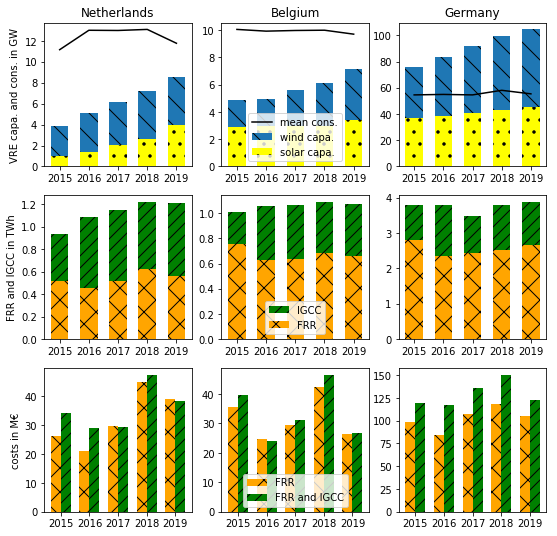

In [15]:
#NL,BEL und GER visualization of VRE capa + FRR and IGCC power and costs

fig, axes = pt.subplots(nrows=3, ncols=3, figsize=(9, 9))
axes[0, 0].set_title("Netherlands")
axes[0, 1].set_title("Belgium")
axes[0, 2].set_title("Germany")

#year= pd.DataFrame()
year = ['2015', '2016', '2017', '2018', '2019']
x = np.arange(len(year))  # the label locations
width = 0.6  # the width of the bars

#plot VRE capacity in first row

axes[0, 0].plot(x,SBi_NL["NL_consumption_GW"],color='black')
axes[0, 0].bar(x,SBi_NL["NL_VRE_GW"],width,hatch='\\')
axes[0, 0].bar(x,SBi_NL["NL_pv_MW"]/1000,width,color='yellow',hatch='.')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(year)
#ax.legend(loc='lower right')
axes[0, 0].set_ylabel("VRE capa. and cons. in GW")

axes[0, 1].plot(x,SBi_BEL["BEL_consumption_GW"],color='black',label='mean cons.')
axes[0, 1].bar(x,SBi_BEL["BEL_VRE_GW"],width,label='wind capa.',hatch='\\')
axes[0, 1].bar(x,SBi_BEL["BEL_pv_MW"]/1000,width,color='yellow',label='solar capa.',hatch='.')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(year)
axes[0, 1].legend(loc='lower center')

axes[0, 2].plot(x,SBi_GER["GER_consumption_GW"],color='black')
axes[0, 2].bar(x,SBi_GER["GER_VRE_GW"],width,hatch='\\')
axes[0, 2].bar(x,SBi_GER["GER_pv_MW"]/1000,width,color='yellow',hatch='.')
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(year)

#plot balancing demand in TWh in second row
#hatch options: '///', '--', '...','\///', 'xxx', '\\\\'

axes[1, 0].bar(x ,SBi_NL["NL_balancing_pow_per_year_GWh"]/1000,width,color='green',hatch='//')
axes[1, 0].bar(x ,SBi_NL["NL_FRR_pow_per_year_GWh"]/1000,width,color='orange',hatch='\\/')

axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(year)
#ax.legend(loc='lower right')
axes[1, 0].set_ylabel("FRR and IGCC in TWh")

axes[1, 1].bar(x ,SBi_BEL["BEL_balancing_pow_per_year_GWh"]/1000,width,color='green',label='IGCC',hatch='//')
axes[1, 1].bar(x ,SBi_BEL["BEL_FRR_pow_per_year_GWh"]/1000,width,color='orange',label='FRR',hatch='\\/')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(year)
axes[1 ,1].legend(loc='lower center')

axes[1, 2].bar(x ,SBi_GER["GER_balancing_pow_per_year_GWh"]/1000,width,color='green',hatch='//')
axes[1, 2].bar(x ,SBi_GER["GER_FRR_pow_per_year_GWh"]/1000,width,color='orange',hatch='\\/')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(year)

#plot costs in mio Euro in third row

width = 0.35  # the width of the bars

#axes[0, 0].bar(x ,SBi_NL["NL_balancing_cost_per_year_kEuro"]/1000,width)
#axes[0, 0].bar(x ,SBi_NL["NL_FRR_cost_per_year_kEuro"]/1000,width)
axes[2, 0].bar(x - width/2,SBi_NL["NL_FRR_cost_per_year_kEuro"]/1000,width,color='orange',hatch='\\/')
axes[2, 0].bar(x + width/2,SBi_NL["NL_balancing_cost_per_year_kEuro"]/1000,width,color='green',hatch='//')
axes[2, 0].set_xticks(x)
axes[2, 0].set_xticklabels(year)
#ax.legend(loc='lower right')
axes[2, 0].set_ylabel("costs in M€")

#axes[0, 1].bar(x ,SBi_BEL["BEL_balancing_cost_per_year_kEuro"]/1000,width)
#axes[0, 1].bar(x ,SBi_BEL["BEL_FRR_cost_per_year_kEuro"]/1000,width)
axes[2, 1].bar(x - width/2,SBi_BEL["BEL_FRR_cost_per_year_kEuro"]/1000,width,color='orange',label='FRR',hatch='\\/')
axes[2, 1].bar(x + width/2,SBi_BEL["BEL_balancing_cost_per_year_kEuro"]/1000,width,color='green',label='FRR and IGCC',hatch='//')
axes[2, 1].set_xticks(x)
axes[2, 1].set_xticklabels(year)
axes[2, 1].legend(loc='lower center')

#axes[0, 2].bar(x ,SBi_GER["GER_balancing_cost_per_year_kEuro"]/1000,width)
#axes[0, 2].bar(x ,SBi_GER["GER_FRR_cost_per_year_kEuro"]/1000,width)
axes[2, 2].bar(x - width/2,SBi_GER["GER_FRR_cost_per_year_kEuro"]/1000,width,color='orange',hatch='\\/')
axes[2, 2].bar(x + width/2,SBi_GER["GER_balancing_cost_per_year_kEuro"]/1000,width,color='green',hatch='//')
axes[2, 2].set_xticks(x)
axes[2, 2].set_xticklabels(year)


pt.show()

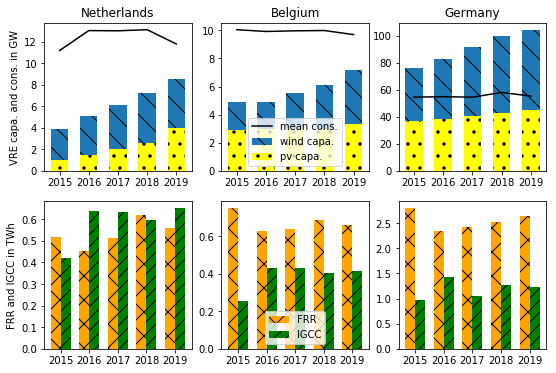

In [16]:
#NL,BEL und GER visualization of VRE capa + FRR and IGCC power 

fig, axes = pt.subplots(nrows=2, ncols=3, figsize=(9, 6))
axes[0, 0].set_title("Netherlands")
axes[0, 1].set_title("Belgium")
axes[0, 2].set_title("Germany")

#year= pd.DataFrame()
year = ['2015', '2016', '2017', '2018', '2019']
x = np.arange(len(year))  # the label locations
width = 0.6  # the width of the bars

#plot VRE capacity in first row

l1 = axes[0, 0].plot(x,SBi_NL["NL_consumption_GW"],color='black')
l2 = axes[0, 0].bar(x,SBi_NL["NL_VRE_GW"],width,hatch='\\')
l3 = axes[0, 0].bar(x,SBi_NL["NL_pv_MW"]/1000,width,color='yellow',hatch='.')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(year)

axes[0, 0].set_ylabel("VRE capa. and cons. in GW")

width = 0.35  # the width of the bars

l4 = axes[1, 0].bar(x + width/2 ,SBi_NL["NL_nett_pow_per_year_GWh"]/1000,width,color='green',hatch='//')
l5 = axes[1, 0].bar(x - width/2 ,SBi_NL["NL_FRR_pow_per_year_GWh"]/1000,width,color='orange',hatch='\\/')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(year)

axes[1, 0].set_ylabel("FRR and IGCC in TWh")

width = 0.6  # the width of the bars

axes[0, 1].plot(x,SBi_BEL["BEL_consumption_GW"],color='black',label='mean cons.')
axes[0, 1].bar(x,SBi_BEL["BEL_VRE_GW"],width,hatch='\\',label='wind capa.')
axes[0, 1].bar(x,SBi_BEL["BEL_pv_MW"]/1000,width,color='yellow',hatch='.',label='pv capa.')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(year)
axes[0, 1].legend(loc='lower center')

axes[0, 2].plot(x,SBi_GER["GER_consumption_GW"],color='black')
axes[0, 2].bar(x,SBi_GER["GER_VRE_GW"],width,hatch='\\')
axes[0, 2].bar(x,SBi_GER["GER_pv_MW"]/1000,width,color='yellow',hatch='.')
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(year)

#plot balancing demand in TWh in second row
#hatch options: '///', '--', '...','\///', 'xxx', '\\\\'
width = 0.35  # the width of the bars

axes[1, 1].bar(x - width/2 ,SBi_BEL["BEL_FRR_pow_per_year_GWh"]/1000,width,color='orange',label='FRR',hatch='\\/')
axes[1, 1].bar(x + width/2 ,SBi_BEL["BEL_nett_pow_per_year_GWh"]/1000,width,color='green',label='IGCC',hatch='//')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(year)
axes[1 ,1].legend(loc='lower center')

axes[1, 2].bar(x + width/2 ,SBi_GER["GER_nett_pow_per_year_GWh"]/1000,width,color='green',hatch='//')
axes[1, 2].bar(x - width/2 ,SBi_GER["GER_FRR_pow_per_year_GWh"]/1000,width,color='orange',hatch='\\/')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(year)

# Create the legend
#fig.legend(axes,     # The line objects
#           labels=["mean cons.","Wind capa.","Solar capa.","FRR","IGCC"],   # The labels for each line
#           loc="center right" ,   # Position of legend
#           borderaxespad=0.1,    # Small spacing around legend box
#           title="Legend"  # Title for the legend
#           )
#pt.subplots_adjust(right=0.82)
pt.show()


fig.savefig("vre_frr_igcc_pow.pdf",bbox_inches='tight')

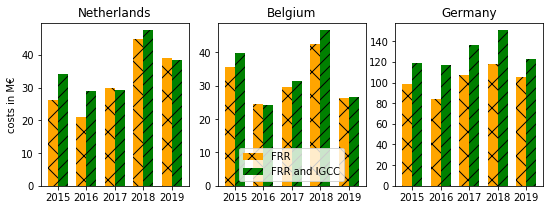

In [25]:
#NL,BEL und GER visualization of FRR and IGCC costs

fig, axes = pt.subplots(nrows=1, ncols=3, figsize=(9, 3))
axes[0].set_title("Netherlands")
axes[1].set_title("Belgium")
axes[2].set_title("Germany")

#year= pd.DataFrame()
year = ['2015', '2016', '2017', '2018', '2019']
x = np.arange(len(year))  # the label locations
width = 0.35  # the width of the bars

#axes[0, 0].bar(x ,SBi_NL["NL_balancing_cost_per_year_kEuro"]/1000,width)
#axes[0, 0].bar(x ,SBi_NL["NL_FRR_cost_per_year_kEuro"]/1000,width)
axes[0].bar(x - width/2,SBi_NL["NL_FRR_cost_per_year_kEuro"]/1000,width,color='orange',hatch='\\/')
axes[0].bar(x + width/2,SBi_NL["NL_balancing_cost_per_year_kEuro"]/1000,width,color='green',hatch='//')
axes[0].set_xticks(x)
axes[0].set_xticklabels(year)
#ax.legend(loc='lower right')
axes[0].set_ylabel("costs in M€")

#axes[0, 1].bar(x ,SBi_BEL["BEL_balancing_cost_per_year_kEuro"]/1000,width)
#axes[0, 1].bar(x ,SBi_BEL["BEL_FRR_cost_per_year_kEuro"]/1000,width)
axes[1].bar(x - width/2,SBi_BEL["BEL_FRR_cost_per_year_kEuro"]/1000,width,color='orange',label='FRR',hatch='\\/')
axes[1].bar(x + width/2,SBi_BEL["BEL_balancing_cost_per_year_kEuro"]/1000,width,color='green',label='FRR and IGCC',hatch='//')
axes[1].set_xticks(x)
axes[1].set_xticklabels(year)
axes[1].legend(loc='lower center')

#axes[0, 2].bar(x ,SBi_GER["GER_balancing_cost_per_year_kEuro"]/1000,width)
#axes[0, 2].bar(x ,SBi_GER["GER_FRR_cost_per_year_kEuro"]/1000,width)
axes[2].bar(x - width/2,SBi_GER["GER_FRR_cost_per_year_kEuro"]/1000,width,color='orange',hatch='\\/')
axes[2].bar(x + width/2,SBi_GER["GER_balancing_cost_per_year_kEuro"]/1000,width,color='green',hatch='//')
axes[2].set_xticks(x)
axes[2].set_xticklabels(year)

# Create the legend
#fig.legend(axes,     # The line objects
#           labels=["FRR","FRR and IGCC"],   # The labels for each line
#           loc="center right" ,   # Position of legend
#           borderaxespad=0.1,    # Small spacing around legend box
#           title="Legend"  # Title for the legend
#           )
#pt.subplots_adjust(right=0.82)
pt.show()

fig.savefig("frr_igcc_costs.pdf",bbox_inches='tight')

## Plot SB indicators

In [26]:
#build df with SB indicators (ee)
SBi_pow_ee = pd.DataFrame()
SBi_pow_ee = SBi_pow_ee.assign(NL_pow=SBi_NL["NL_pow_per_year_ee"],BEL_pow=SBi_BEL["BEL_pow_per_year_ee"],GER_pow=SBi_GER["GER_pow_per_year_ee"])

Text(0, 0.5, 'EE Smart Balancing indicator power')

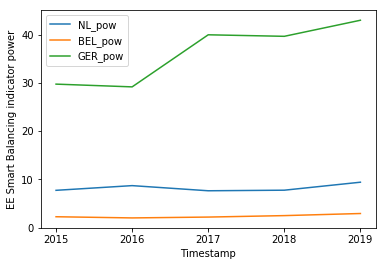

In [27]:
SBi_pow_ee.plot()
pt.ylabel('EE Smart Balancing indicator power') 

In [28]:
#build df with SB indicators (ee)
SBi_cost_ee = pd.DataFrame()
SBi_cost_ee = SBi_cost_ee.assign(NL_cost=SBi_NL["NL_cost_per_year_ee"],BEL_cost=SBi_BEL["BEL_cost_per_year_ee"],GER_cost=SBi_GER["GER_cost_per_year_ee"])

Text(0, 0.5, 'EE Smart Balancing indicator costs')

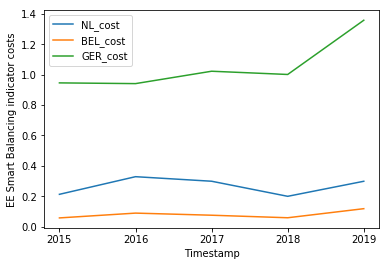

In [29]:
SBi_cost_ee.plot()
pt.ylabel('EE Smart Balancing indicator costs') 

In [30]:
#build df with SB indicators (sqr)
SBi_pow_sqr = pd.DataFrame()
SBi_pow_sqr = SBi_pow_sqr.assign(NL_pow=SBi_NL["NL_pow_per_year_sqr"],BEL_pow=SBi_BEL["BEL_pow_per_year_sqr"],GER_pow=SBi_GER["GER_pow_per_year_sqr"])

Text(0, 0.5, 'EE Smart Balancing indicator power')

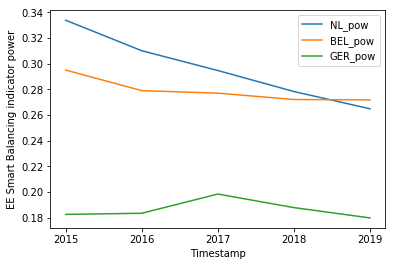

In [31]:
SBi_pow_sqr.plot()
pt.ylabel('EE Smart Balancing indicator power') 


In [32]:
#build df with SB indicators (sqr)
SBi_cost_sqr = pd.DataFrame()
SBi_cost_sqr = SBi_cost_sqr.assign(NL_costs=SBi_NL["NL_cost_per_year_sqr"],BEL_costs=SBi_BEL["BEL_cost_per_year_sqr"],GER_costs=SBi_GER["GER_cost_per_year_sqr"])

Text(0, 0.5, 'Square Smart Balancing indicator costs')

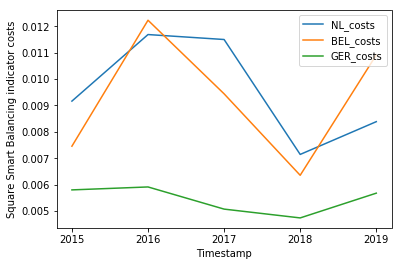

In [33]:
SBi_cost_sqr.plot()
pt.ylabel('Square Smart Balancing indicator costs') 

In [34]:
#build df with SB indicators (lin)
WCi_pow_lin = pd.DataFrame()
WCi_pow_lin = WCi_pow_lin.assign(NL_pow=SBi_NL["NL_pow_per_year_lin"],BEL_pow=SBi_BEL["BEL_pow_per_year_lin"],GER_pow=SBi_GER["GER_pow_per_year_lin"])

Text(0, 0.5, 'Linear Smart Balancing indicator power')

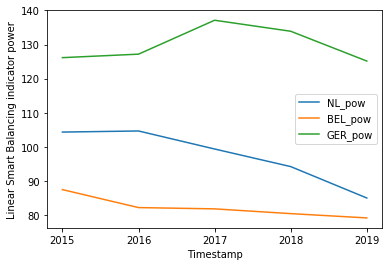

In [35]:
WCi_pow_lin.plot()
pt.ylabel('Linear Smart Balancing indicator power')

In [36]:
#build df with SB indicators (lin)
WCi_cost_lin = pd.DataFrame()
WCi_cost_lin = WCi_cost_lin.assign(NL_costs=SBi_NL["NL_cost_per_year_lin"],BEL_costs=SBi_BEL["BEL_cost_per_year_lin"],GER_costs=SBi_GER["GER_cost_per_year_lin"])

Text(0, 0.5, 'Linear Smart Balancing indicator costs')

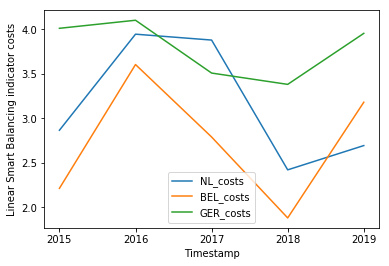

In [37]:
WCi_cost_lin.plot()
pt.ylabel('Linear Smart Balancing indicator costs') 